# =phenotype ^ !=t 17/05/2022

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle5 as pickle

In [186]:
## Analize subjects with images at different instances

dir_ukb_csv_1 = '/NVME/decrypted/ukbb/labels/1_data_extraction/ukb34181.csv' 
phenofiles_dir = '/NVME/decrypted/ukbb/fundus/phenotypes'
save_file = '/SSD/home/sofia/retina/' 

list_right_eyes = ['eid', '21016-0.0', '21016-1.0', '21016-0.1', '21016-1.1']
list_left_eyes = ['eid', '21015-0.0', '21015-1.0', '21015-0.1', '21015-1.1'] 

df_data = pd.read_csv(dir_ukb_csv_1, sep=',')

df_data_right = df_data[list_right_eyes]
df_data_left = df_data[list_left_eyes]

## Only select subjects with: (0.0 or 0.1) and (1.0 or 1.1) !=nan

In [199]:
# Replace nans by 0 to avoid nans issues
df_data_right['21016-0.0'] = df_data_right['21016-0.0'].fillna(0)
df_data_right['21016-0.1'] = df_data_right['21016-0.1'].fillna(0)
df_data_right['21016-1.0'] = df_data_right['21016-1.0'].fillna(0)
df_data_right['21016-1.1'] = df_data_right['21016-1.1'].fillna(0)

df_data_left['21015-0.0'] = df_data_left['21015-0.0'].fillna(0)
df_data_left['21015-0.1'] = df_data_left['21015-0.1'].fillna(0)
df_data_left['21015-1.0'] = df_data_left['21015-1.0'].fillna(0)
df_data_left['21015-1.1'] = df_data_left['21015-1.1'].fillna(0)

df_right_intersection = df_data_right[((df_data_right['21016-0.0']!=0)|(df_data_right['21016-0.1']!=0)) & 
                                    ((df_data_right['21016-1.0']!=0)|(df_data_right['21016-1.1']!=0))]

df_left_intersection = df_data_left[((df_data_left['21015-0.0']!=0)|(df_data_left['21015-0.1']!=0)) & 
                                    ((df_data_left['21015-1.0']!=0)|(df_data_left['21015-1.1']!=0))]

print('len df_right_intersection:',len(df_right_intersection), ', and len df_left_intersection:',len(df_left_intersection))


/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

len df_right_intersection: 2283 , and len df_left_intersection: 2257


In [188]:
df_right_intersection['image_00']=df_right_intersection['eid'].astype(str) + '_21016_0_0.png'
df_right_intersection['image_01']=df_right_intersection['eid'].astype(str) + '_21016_0_1.png'
df_right_intersection['image_10']=df_right_intersection['eid'].astype(str) + '_21016_1_0.png'
df_right_intersection['image_11']=df_right_intersection['eid'].astype(str) + '_21016_1_1.png'

df_left_intersection['image_00']=df_left_intersection['eid'].astype(str) + '_21015_0_0.png'
df_left_intersection['image_01']=df_left_intersection['eid'].astype(str) + '_21015_0_1.png'
df_left_intersection['image_10']=df_left_intersection['eid'].astype(str) + '_21015_1_0.png'
df_left_intersection['image_11']=df_left_intersection['eid'].astype(str) + '_21015_1_1.png'

/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [189]:
## Read phenofiles data 
pheno_ARIA = pd.read_csv(phenofiles_dir + '/2021-12-28_ARIA_phenotypes.csv')
pheno_N_green = pd.read_csv(phenofiles_dir + '/2022-02-01_N_green_pixels.csv')
pheno_N_bif = pd.read_csv(phenofiles_dir+ '/2022-02-04_bifurcations.csv')
pheno_tVA = pd.read_csv(phenofiles_dir+ '/2022-02-13_tVA_phenotypes.csv')
pheno_tAA = pd.read_csv(phenofiles_dir + '/2022-02-14_tAA_phenotypes.csv')
pheno_NeoOD = pd.read_csv(phenofiles_dir + '/2022-02-17_NeovasOD_phenotypes.csv')
pheno_greenOD = pd.read_csv(phenofiles_dir + "/2022-02-21_green_pixels_over_total_OD_phenotypes.csv")
pheno_N_green_seg = pd.read_csv(phenofiles_dir + "/2022-02-21_N_green_segments_phenotypes.csv")
pheno_FD = pd.read_csv(phenofiles_dir + "/2021-11-30_fractalDimension.csv")
pheno_VD = pd.read_csv(phenofiles_dir + "/2022-04-12_vascular_density.csv")

## Add name to the first column
pheno_ARIA.rename(columns={pheno_ARIA.columns[0]: 'image'}, inplace=True)
pheno_N_green.rename(columns={pheno_N_green.columns[0]: 'image'}, inplace=True)
pheno_N_bif.rename(columns={pheno_N_bif.columns[0]: 'image', pheno_N_bif.columns[1]: 'N_bif'}, inplace=True)
pheno_tVA.rename(columns={pheno_tVA.columns[0]: 'image'}, inplace=True)
pheno_tAA.rename(columns={pheno_tAA.columns[0]: 'image'}, inplace=True)
pheno_NeoOD.rename(columns={pheno_NeoOD.columns[0]: 'image'}, inplace=True)
pheno_greenOD.rename(columns={pheno_greenOD.columns[0]: 'image'}, inplace=True)
pheno_N_green_seg.rename(columns={pheno_N_green_seg.columns[0]: 'image'}, inplace=True)
pheno_FD.rename(columns={pheno_FD.columns[0]: 'image'}, inplace=True)
pheno_VD.rename(columns={pheno_VD.columns[0]: 'image'}, inplace=True)

In [190]:
print(pheno_NeoOD.columns, pheno_greenOD.columns, pheno_N_green_seg.columns, pheno_FD.columns, pheno_VD.columns)

Index(['image', 'pixels_close_OD_over_total'], dtype='object') Index(['image', 'green_pixels_over_total_OD'], dtype='object') Index(['image', 'N_total_green_segments'], dtype='object') Index(['image', 'FD_all', 'FD_artery', 'FD_vein'], dtype='object') Index(['image', 'VD_orig_all', 'VD_orig_artery', 'VD_orig_vein',
       'VD_200px_all', 'VD_200px_artery', 'VD_200px_vein'],
      dtype='object')


In [191]:
#pheno_ARIA.columns
#### to define!
pheno_of_interest = pheno_ARIA # pheno_N_bif, pheno_ARIA, pheno_N_green, pheno_tVA, pheno_tAA, pheno_NeoOD, pheno_greenOD, pheno_N_green_seg
                                # pheno_FD, pheno_VD

pheno_name='DF_all' #'N_bif', 'medianDiameter_all', 'DF_all', 'N_green', 'tVA', 'tAA', 'pixels_close_OD_over_total'
                                        # 'green_pixels_over_total_OD', 'N_total_green_segments', 'FD_all', 'VD_orig_all'

In [192]:
## right eye
df_right_intersection_00 = df_right_intersection.merge(pheno_of_interest, how='left', left_on=['image_00'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_00.drop(df_right_intersection_00.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_01 = df_right_intersection.merge(pheno_of_interest, how='left', left_on=['image_01'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_01.drop(df_right_intersection_01.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_10 = df_right_intersection.merge(pheno_of_interest, how='left', left_on=['image_10'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_10.drop(df_right_intersection_10.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_11 = df_right_intersection.merge(pheno_of_interest, how='left', left_on=['image_11'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_11.drop(df_right_intersection_11.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

## left eye
df_left_intersection_00 = df_left_intersection.merge(pheno_of_interest, how='left', left_on=['image_00'], right_on=['image'], suffixes=('', '_y'))
df_left_intersection_00.drop(df_left_intersection_00.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_left_intersection_01 = df_left_intersection.merge(pheno_of_interest, how='left', left_on=['image_01'], right_on=['image'], suffixes=('', '_y'))
df_left_intersection_01.drop(df_left_intersection_01.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_left_intersection_10 = df_left_intersection.merge(pheno_of_interest, how='left', left_on=['image_10'], right_on=['image'], suffixes=('', '_y'))
df_left_intersection_10.drop(df_left_intersection_10.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_left_intersection_11 = df_left_intersection.merge(pheno_of_interest, how='left', left_on=['image_11'], right_on=['image'], suffixes=('', '_y'))
df_left_intersection_11.drop(df_left_intersection_11.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [193]:
# To avaid having the same name
## right 
df_right_intersection_00.rename(columns = {pheno_name: pheno_name+'_00'}, inplace = True)
df_right_intersection_10.rename(columns = {pheno_name: pheno_name+'_10'}, inplace = True)
df_right_intersection_01.rename(columns = {pheno_name: pheno_name+'_01'}, inplace = True)
df_right_intersection_11.rename(columns = {pheno_name:pheno_name+'_11'}, inplace = True)

## left
df_left_intersection_00.rename(columns = {pheno_name: pheno_name+'_00'}, inplace = True)
df_left_intersection_01.rename(columns = {pheno_name: pheno_name+'_10'}, inplace = True)
df_left_intersection_10.rename(columns = {pheno_name: pheno_name+'_01'}, inplace = True)
df_left_intersection_11.rename(columns = {pheno_name:pheno_name+'_11'}, inplace = True)

len(df_right_intersection_00):  2283
len(df_left_intersection_00):  2257


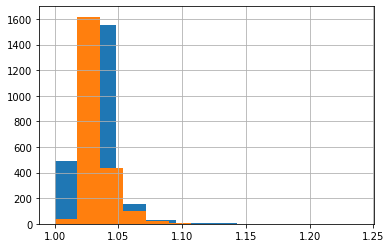

In [194]:
df_right_intersection_00[pheno_name+'_00'].hist()
print('len(df_right_intersection_00): ', len(df_right_intersection_00))

df_left_intersection_00[pheno_name+'_00'].hist()
print('len(df_left_intersection_00): ', len(df_left_intersection_00))

In [195]:
## Merge 00, 01, 10 and 11 
# Right: 
df_right_intersection_all = df_right_intersection_00.merge(df_right_intersection_01, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_intersection_all = df_right_intersection_all.merge(df_right_intersection_10, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_intersection_all = df_right_intersection_all.merge(df_right_intersection_11, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print('len(df_right_intersection_all)', len(df_right_intersection_all))
#df_right_intersection_all.head(10)

# Right: 
df_left_intersection_all = df_left_intersection_00.merge(df_left_intersection_01, how='left', on='image_00', suffixes=('', '_y'))
df_left_intersection_all.drop(df_left_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_left_intersection_all = df_left_intersection_all.merge(df_left_intersection_10, how='left', on='image_00', suffixes=('', '_y'))
df_left_intersection_all.drop(df_left_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_left_intersection_all = df_left_intersection_all.merge(df_left_intersection_11, how='left', on='image_00', suffixes=('', '_y'))
df_left_intersection_all.drop(df_left_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print('len(df_left_intersection_all)', len(df_left_intersection_all))



len(df_right_intersection_all) 2283
len(df_left_intersection_all) 2257


In [196]:
### Create two new columns abs(00-10) and |00-10|
#Right 
df_right_intersection_all['00_menos_10']=(df_right_intersection_all[pheno_name+'_00']-df_right_intersection_all[pheno_name+'_10'])
df_right_intersection_all['00_menos_10']=(df_right_intersection_all['00_menos_10']-df_right_intersection_all['00_menos_10'].mean())/df_right_intersection_all['00_menos_10'].std()
#df_right_intersection_all['00_menos_10'].hist(bins=20)
print('len(df_right_intersection_all)', len(df_right_intersection_all))

#Right 
df_left_intersection_all['00_menos_10']=(df_left_intersection_all[pheno_name+'_00']-df_left_intersection_all[pheno_name+'_10'])
df_left_intersection_all['00_menos_10']=(df_left_intersection_all['00_menos_10']-df_left_intersection_all['00_menos_10'].mean())/df_left_intersection_all['00_menos_10'].std()
print('len(df_left_intersection_all)', len(df_left_intersection_all))


### Save file before QC
### Saving files
df_right_intersection_all.to_csv('/SSD/home/sofia/retina/Different_time_points/results/'+ pheno_name + '_right_before_QC.csv') 
df_left_intersection_all.to_csv('/SSD/home/sofia/retina/Different_time_points/results/'+ pheno_name + '_left_before_QC.csv')   

len(df_right_intersection_all) 2283
len(df_left_intersection_all) 2257


In [197]:
## Filter by QC
df_QC = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/ageCorrected_ventiles5.txt", sep=',', header=None)
df_QC.columns = ['image_QC']
#df_QC.head(10)

#Right:
df_right_QC = pd.merge(df_QC, df_right_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_00'], suffixes=('', '_y'))
df_right_QC.drop(df_right_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_QC = pd.merge(df_QC, df_right_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_10'], suffixes=('', '_y'))
df_right_QC.drop(df_right_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_QC['abs00_menos_10']=abs(df_right_QC[pheno_name+'_00']-df_right_QC[pheno_name+'_10'])
df_right_QC['abs00_menos_10']=(df_right_QC['abs00_menos_10']-df_right_QC['abs00_menos_10'].mean())/df_right_QC['abs00_menos_10'].std()
print('len(df_right_QC): ', len(df_right_QC))
#df_right_QC['abs00_menos_10'].hist(bins=20)

df_right_QC['00_menos_10']=(df_right_QC[pheno_name+'_00']-df_right_QC[pheno_name+'_10'])
df_right_QC['00_menos_10']=(df_right_QC['00_menos_10']-df_right_QC['00_menos_10'].mean())/df_right_QC['00_menos_10'].std()
#df_right_QC['00_menos_10'].hist(bins=20)

#Left:
df_left_QC = pd.merge(df_QC, df_left_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_00'], suffixes=('', '_y'))
df_left_QC.drop(df_left_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_left_QC = pd.merge(df_QC, df_left_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_10'], suffixes=('', '_y'))
df_left_QC.drop(df_left_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_left_QC['abs00_menos_10']=abs(df_left_QC[pheno_name+'_00']-df_left_QC[pheno_name+'_10'])
df_left_QC['abs00_menos_10']=(df_left_QC['abs00_menos_10']-df_left_QC['abs00_menos_10'].mean())/df_left_QC['abs00_menos_10'].std()
print('len(df_left_QC): ', len(df_left_QC))
#df_left_QC['abs00_menos_10'].hist(bins=20)

df_left_QC['00_menos_10']=(df_left_QC[pheno_name+'_00']-df_left_QC[pheno_name+'_10'])
df_left_QC['00_menos_10']=(df_left_QC['00_menos_10']-df_left_QC['00_menos_10'].mean())/df_left_QC['00_menos_10'].std()
#df_left_QC['00_menos_10'].hist(bins=20)

### Saving files
df_right_QC.to_csv('/SSD/home/sofia/retina/Different_time_points/results/'+ pheno_name + '_right_QC.csv') 
df_left_QC.to_csv('/SSD/home/sofia/retina/Different_time_points/results/'+ pheno_name + '_left_QC.csv')   

len(df_right_QC):  1396
len(df_left_QC):  1413


In [198]:
#df_right_intersection = df_right_intersection.merge(pheno_tVA, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_tAA, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_NeoOD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_greenOD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_N_green_seg, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_FD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_VD, how='left', left_on=['image_00'], right_on=['image'])
